In [7]:
# Import
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import matplotlib.pyplot as plt
from pandas import Index

In [8]:
# Load datasets
mm3 = pd.read_excel("../DANL470/Attempt_MM3.xlsx")
mm5 = pd.read_excel("../DANL470/Attempt_MM5.xlsx")

In [9]:
# Divide into categories and numerical
mm3_cat = mm3.select_dtypes(object)
mm5_cat = mm5.select_dtypes(object)

mm3_num = mm3.select_dtypes(np.number)
mm5_num = mm5.select_dtypes(np.number)

In [10]:
# Check for null values
mm3_cat.isnull().sum()

Maternal_age    0
dtype: int64

In [11]:
# Check for null values
mm5_cat.isnull().sum()

Demographic_variable    0
dtype: int64

In [12]:
# Replace categories with numerical values
mm3_cat = mm3_cat.apply(le.fit_transform)
mm5_cat = mm5_cat.apply(le.fit_transform)

In [13]:
# Check for null values
mm3_num.isna().sum()

All_races_maternal_deaths            0
All_races_number_of_live_births      0
All_races_maternal_mortality_rate    0
NH_White_maternal_deaths             0
NH_white_number_of_live_Births       0
NH_White_maternal_mortality_rate     0
NH_black_maternal_deaths             0
NH_Black_number_of_live_births       0
NH_Black_maternal_mortality_rate     0
Hispanic_maternal_deaths             0
Hispanic_number_of_live_births       0
Hispanic_maternal_mortality_rate     0
dtype: int64

In [14]:
# Check for null values
mm5_num.isna().sum()

Under_20_Maternal_age                    0
20_to_24_Maternal_age                    0
25_to_29_Maternal_age                    0
30_to_34_Maternal_age                    0
35_to_39_Maternal_age                    0
40_or_over_Maternal_age                  0
All_ages_Maternal_age                    0
Under_12_years_Maternal_education_1      0
12_years_Maternal_education_1            0
13_15_years_Maternal_education_1         0
16_or_more_years_Maternal_education_1    0
Married_Marital_status_2                 0
Unmarried_Marital_status_2               0
US_born                                  0
Foreign_born                             0
Metro_(urban)                            0
Non_Metro_(rural)                        0
Northeast                                0
Midwest                                  0
South                                    0
West                                     1
Infections                               1
HIV                                      6
Chronic_dis

In [15]:
# Replace null values with the mean of the columns
mm5_num.West.fillna(mm5_num.West.mean(), inplace=True)
mm5_num.Infections.fillna(mm5_num.Infections.mean(), inplace=True)
mm5_num.HIV.fillna(mm5_num.HIV.mean(), inplace=True)
mm5_num.Mental_disorders.fillna(mm5_num.Mental_disorders.mean(), inplace=True)

In [16]:
# Combine the datasets
mm3_final = pd.concat([mm3_cat,mm3_num], axis=1)
mm5_final = pd.concat([mm5_cat,mm5_num], axis=1)

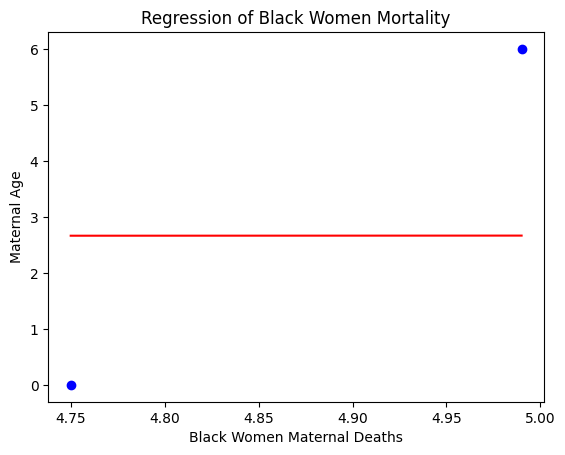

In [25]:
# Target/independent variable
x = mm3_final[['NH_Black_maternal_mortality_rate']].values
# Target variable/dependent variable
y = mm3_final['Maternal_age'].values

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regression_model = LinearRegression()

# Train the regression model on training data
regression_model.fit(x_train, y_train)

# Plot the data points and linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, regression_model.predict(x_test), color='red')
plt.title('Regression of Black Women Mortality')
plt.xlabel('Black Women Maternal Deaths')
plt.ylabel('Maternal Age')
plt.show()

In [24]:
print(mm3.columns)

Index(['Maternal_age', 'All_races_maternal_deaths',
       'All_races_number_of_live_births', 'All_races_maternal_mortality_rate',
       'NH_White_maternal_deaths', 'NH_white_number_of_live_Births',
       'NH_White_maternal_mortality_rate', 'NH_black_maternal_deaths',
       'NH_Black_number_of_live_births', 'NH_Black_maternal_mortality_rate',
       'Hispanic_maternal_deaths', 'Hispanic_number_of_live_births',
       'Hispanic_maternal_mortality_rate'],
      dtype='object')
